# Approximate Bayesnian Comp

## Data
Data we want to model... say Phil's height

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform 
from scipy.stats import norm
from parameters import Params

data = {}
data['input'] = np.arange(-1.0, 1.0, 0.1)
data['output'] = 1.*np.exp(-0.5 * data['input']**2/1.0)

(-1.0, 1.0)

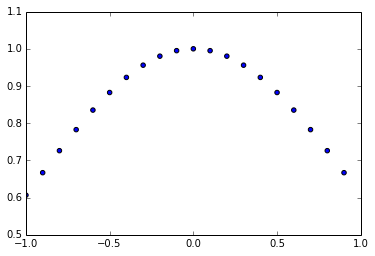

In [2]:
fig = plt.figure() 
sub = fig.add_subplot(111)
sub.scatter(data['input'], data['output'])
sub.set_xlim([-1.0,1.0])

## Simulator
Our model for Phil's height as a function of time during the day

In [3]:
def simz(theta): 
    mu = theta[0]
    sigma = theta[1]
    
    def func(x): 
        return 1.0 * np.exp(-0.5 * (x - mu)**2 / sigma )

    return func

# Distance Measure
Quantify how close to the data our model is

In [4]:
def dist(data, model): 
    data_out = data['output']
    model_out = model(data['input'])
    
    rho_mu = np.abs(
        (np.mean(data_out) - np.mean(model_out))/np.mean(data_out)
    )
    
    rho_sigma = np.abs(
        (np.std(data_out) - np.std(model_out))/np.std(data_out)
    )
    
    return rho_mu + rho_sigma

# Prior
Our beliefs about when Phil is tallest

In [5]:
from pmc_abc import PmcAbc

pmcabc_test = PmcAbc(data, simz, N=500, eps0 = 0.5, T = 10, Nthreads=3)
pmcabc_test.prior_param(
    param_dict={
        'mu': {'shape': 'uniform', 'min': -1.0, 'max': 1.0}, 
        'sigma': {'shape': 'uniform', 'min': .8, 'max': 1.2}
    }
)
pmcabc_test.pmc_abc()

Epsilon t 0.326200571932
Epsilon t 0.223223090516
Epsilon t 0.177629695576
Epsilon t 0.138163798873
Epsilon t 0.108194950437
Epsilon t 0.0854576604276
Epsilon t 0.0663048564453
Epsilon t 0.0533615409513
Epsilon t 0.0444297754684
Epsilon t 0.0376186047332
